# Text preprocessing


The following code is used to preprocess the text data. The text data is cleaned and the labels are converted to numbers. Then the 3 datasets are combined into one dataset. The dataset is then saved as a csv file in cleaned folder.

## Import libraries

The libraries required to run the code are imported.

In [6]:
import pandas as pd
import wave
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## First Dataset is text_emotion

The first dataset is text_emotion. The dataset is read in and the columns that are not required are dropped. The column names are changed from content to text and sentiment to label. The labels are converted to numbers from 0 to 6. Finally, show the distribution of the labels in a histogram.

In [2]:
# Read in the data
df_1 = pd.read_csv('../data/text_emotion.csv')

In [3]:
# Check the data
df_1.head()

tweet_id   sentiment       author  \
0  1956967341       empty   xoshayzers   
1  1956967666     sadness    wannamama   
2  1956967696     sadness    coolfunky   
3  1956967789  enthusiasm  czareaquino   
4  1956968416     neutral    xkilljoyx   

                                             content  
0  @tiffanylue i know  i was listenin to bad habi...  
1  Layin n bed with a headache  ughhhh...waitin o...  
2                Funeral ceremony...gloomy friday...  
3               wants to hang out with friends SOON!  
4  @dannycastillo We want to trade with someone w...

In [4]:
df_clean_1 = df_1
df_clean_1.drop(['author', 'tweet_id'], axis=1, inplace=True)

df_clean_1.rename(columns={'content': 'text'}, inplace=True)
df_clean_1.rename(columns={'sentiment': 'label'}, inplace=True)

In [5]:
# Check the data
print(df_clean_1.head())
print(df_clean_1.shape)

        label                                               text
0       empty  @tiffanylue i know  i was listenin to bad habi...
1     sadness  Layin n bed with a headache  ughhhh...waitin o...
2     sadness                Funeral ceremony...gloomy friday...
3  enthusiasm               wants to hang out with friends SOON!
4     neutral  @dannycastillo We want to trade with someone w...
(40000, 2)


In [6]:
#sadness = 0, joy = 1, love = 2, anger = 3, fear = 4, surprise = 5, neutral = 6
df_clean_1['label'] = df_clean_1['label'].replace(['sadness', 'empty'], 0)
df_clean_1['label'] = df_clean_1['label'].replace(['joy', 'happiness', 'fun', 'enthusiasm', 'relief'], 1)
df_clean_1['label'] = df_clean_1['label'].replace(['love'], 2)
df_clean_1['label'] = df_clean_1['label'].replace(['anger', 'hate'], 3)
df_clean_1['label'] = df_clean_1['label'].replace(['fear', 'worry'], 4)
df_clean_1['label'] = df_clean_1['label'].replace(['surprise'], 5)
df_clean_1['label'] = df_clean_1['label'].replace(['neutral', 'boredom'], 6)

In [7]:
# Check the data
print(df_clean_1.head())

   label                                               text
0      0  @tiffanylue i know  i was listenin to bad habi...
1      0  Layin n bed with a headache  ughhhh...waitin o...
2      0                Funeral ceremony...gloomy friday...
3      1               wants to hang out with friends SOON!
4      6  @dannycastillo We want to trade with someone w...


In [8]:
# read the values from column 'label' into a list
label_list = df_clean_1['label'].tolist()
print(label_list)

[0, 0, 0, 1, 6, 4, 0, 4, 0, 0, 6, 4, 0, 0, 5, 0, 2, 0, 4, 0, 4, 1, 6, 4, 0, 4, 0, 4, 0, 4, 3, 6, 6, 6, 6, 6, 0, 4, 6, 6, 1, 1, 4, 4, 0, 4, 4, 0, 6, 6, 6, 4, 0, 6, 6, 4, 1, 6, 6, 0, 4, 0, 0, 0, 0, 6, 4, 0, 4, 1, 6, 4, 6, 6, 4, 6, 6, 1, 4, 4, 0, 6, 0, 4, 0, 4, 3, 4, 4, 4, 6, 6, 4, 6, 2, 0, 0, 0, 6, 3, 4, 3, 6, 0, 4, 3, 0, 3, 4, 0, 4, 6, 6, 6, 6, 6, 0, 6, 6, 0, 6, 3, 2, 4, 3, 0, 1, 0, 6, 4, 6, 2, 0, 6, 6, 0, 0, 6, 6, 4, 6, 0, 6, 4, 6, 4, 6, 1, 1, 6, 0, 2, 4, 4, 4, 4, 6, 4, 4, 4, 3, 4, 0, 0, 5, 1, 0, 4, 0, 6, 4, 0, 4, 0, 0, 6, 6, 4, 6, 1, 0, 6, 1, 0, 4, 0, 0, 4, 4, 5, 5, 0, 5, 0, 5, 4, 3, 4, 1, 4, 0, 4, 0, 0, 0, 6, 3, 6, 6, 3, 2, 0, 3, 0, 0, 1, 3, 6, 6, 3, 6, 6, 4, 5, 6, 4, 0, 4, 0, 4, 4, 6, 6, 1, 1, 6, 0, 4, 0, 4, 6, 6, 0, 4, 0, 0, 1, 4, 6, 4, 1, 6, 4, 6, 0, 5, 3, 6, 4, 5, 5, 4, 3, 3, 6, 6, 4, 0, 0, 0, 0, 6, 0, 5, 4, 0, 0, 5, 4, 6, 4, 0, 6, 3, 6, 4, 1, 6, 6, 5, 6, 0, 4, 1, 4, 6, 4, 0, 6, 3, 4, 0, 3, 6, 0, 6, 6, 6, 1, 3, 6, 6, 1, 0, 0, 3, 6, 4, 4, 4, 4, 0, 6, 0, 0, 4, 0, 0, 0, 4, 6, 0, 0, 

### Data distribution for first dataset

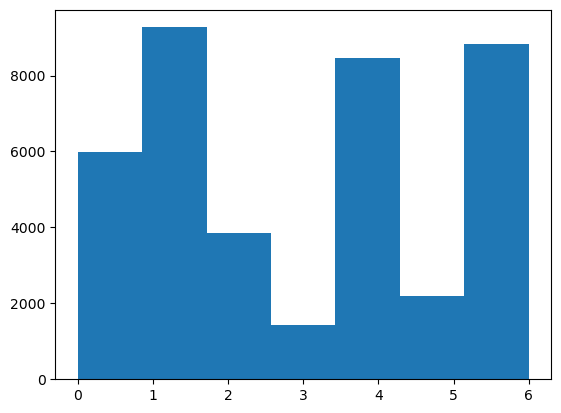

In [9]:
# put the list into a graph
plt.hist(label_list, bins=7)
plt.show()

In [10]:
#drop na
df_clean_1.dropna(inplace=True)
print(df_clean_1.shape)
print(df_clean_1.head())

(40000, 2)
   label                                               text
0      0  @tiffanylue i know  i was listenin to bad habi...
1      0  Layin n bed with a headache  ughhhh...waitin o...
2      0                Funeral ceremony...gloomy friday...
3      1               wants to hang out with friends SOON!
4      6  @dannycastillo We want to trade with someone w...


## Second dataset training

The second dataset is training. The dataset is read in a dataframe. The dataset is cleaned by dropping the rows with missing values. The two datasets are combined into one dataset. Finally, the distribution of the labels is shown in a histogram.

In [2]:
# Read in the data
df_2 = pd.read_csv('../data/training.csv')

In [3]:
# Check the data
df_2.head()

text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3

In [5]:
#drop na
df_clean_2 = df_2
df_clean_2.dropna(inplace=True)
print(df_clean_2.shape)
print(df_clean_2.head())

(16000, 2)
                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3


In [14]:
# join datasets
df_clean = pd.concat([df_clean_1, df_clean_2], ignore_index=True)
print(df_clean.shape)

(56000, 2)


### Data distribution for second dataset

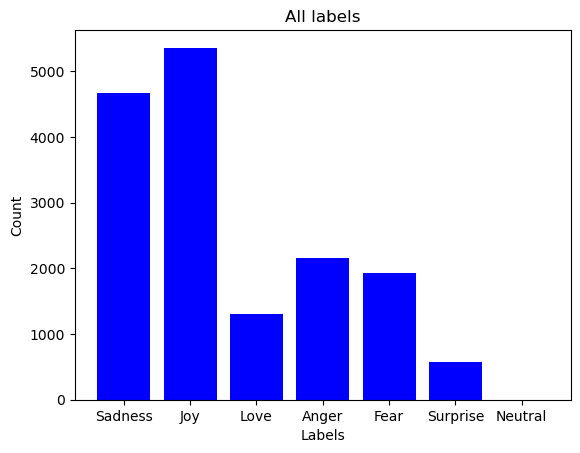

In [8]:
# histogram of the labels df_clean_2
label_list_2 = df_clean_2['label'].tolist()
#sadness = 0, joy = 1, love = 2, anger = 3, fear = 4, surprise = 5, neutral = 6
fig, ax = plt.subplots()
sentiments = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise', 'Neutral']
counts = [label_list_2.count(0), label_list_2.count(1), label_list_2.count(2), label_list_2.count(3), label_list_2.count(4), label_list_2.count(5), label_list_2.count(6)]

ax.bar(sentiments, counts, color='blue')
ax.set_title('All labels')
ax.set_xlabel('Labels')
ax.set_ylabel('Count')
plt.show()

### Data distribution for combined dataset

The distribution of the labels is shown in a histogram for the combined dataset.

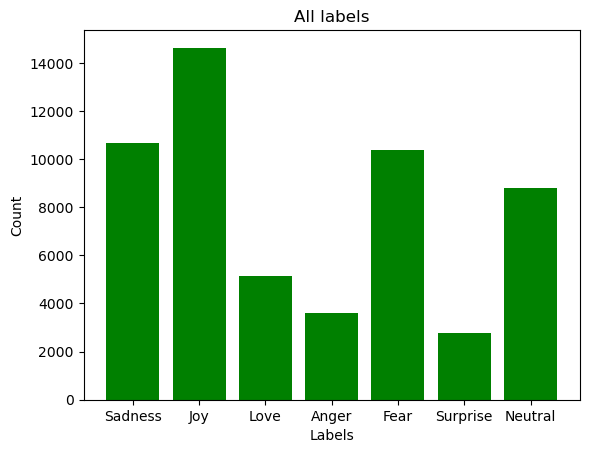

In [15]:
label_list_clean = df_clean['label'].tolist()

#sadness = 0, joy = 1, love = 2, anger = 3, fear = 4, surprise = 5, neutral = 6
fig, ax = plt.subplots()
sentiments = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise', 'Neutral']
counts = [label_list_clean.count(0), label_list_clean.count(1), label_list_clean.count(2), label_list_clean.count(3), label_list_clean.count(4), label_list_clean.count(5), label_list_clean.count(6)]

ax.bar(sentiments, counts, color='green')
ax.set_title('All labels')
ax.set_xlabel('Labels')
ax.set_ylabel('Count')
plt.show()

## Third dataset train_sent_emo

The third dataset is train_sent_emo. The dataset is read in a dataframe. The dataset is cleaned by dropping the columns that wouldn't be use and rows with missing values. The column names are changed from Utterance to text and Emotion to label. The labels are converted to numbers from 0 to 6. The dataset is combined with the other two datasets.Finally, the distribution of the labels is shown in a histogram.

In [15]:
# Read in the data
df_3 = pd.read_csv('../data/train_sent_emo.csv')
# Check the data
df_3.head()

Sr No.                                          Utterance          Speaker  \
0       1  also I was the point person on my company’s tr...         Chandler   
1       2                   You must’ve had your hands full.  The Interviewer   
2       3                            That I did. That I did.         Chandler   
3       4      So let’s talk a little bit about your duties.  The Interviewer   
4       5                             My duties?  All right.         Chandler   

    Emotion Sentiment  Dialogue_ID  Utterance_ID  Season  Episode  \
0   neutral   neutral            0             0       8       21   
1   neutral   neutral            0             1       8       21   
2   neutral   neutral            0             2       8       21   
3   neutral   neutral            0             3       8       21   
4  surprise  positive            0             4       8       21   

      StartTime       EndTime  
0  00:16:16,059  00:16:21,731  
1  00:16:21,940  00:16:23,442  
2  00:16:23,442  00:16:26,389  
3  00:16:26,820  00:16:29,572  
4  00:16:34,452  00:16:40,917

In [16]:
df_clean_3 = df_3
df_clean_3.drop(['Sr No.', 'Speaker','Sentiment','Dialogue_ID','Utterance_ID','Season','Episode','StartTime','EndTime'], axis=1, inplace=True)

df_clean_3.rename(columns={'Utterance': 'text'}, inplace=True)
df_clean_3.rename(columns={'Emotion': 'label'}, inplace=True)
# Check the data
print(df_clean_3.head())
print(df_clean_3.shape)
#sadness = 0, joy = 1, love = 2, anger = 3, fear = 4, surprise = 5, neutral = 6

                                                text     label
0  also I was the point person on my company’s tr...   neutral
1                   You must’ve had your hands full.   neutral
2                            That I did. That I did.   neutral
3      So let’s talk a little bit about your duties.   neutral
4                             My duties?  All right.  surprise
(9989, 2)


In [17]:
df_clean_3['label'] = df_clean_3['label'].replace(['sadness', 'empty'], 0)
df_clean_3['label'] = df_clean_3['label'].replace(['joy', 'happiness', 'fun', 'enthusiasm', 'relief'], 1)
df_clean_3['label'] = df_clean_3['label'].replace(['love'], 2)
df_clean_3['label'] = df_clean_3['label'].replace(['anger', 'hate','disgust'], 3)
df_clean_3['label'] = df_clean_3['label'].replace(['fear', 'worry'], 4)
df_clean_3['label'] = df_clean_3['label'].replace(['surprise'], 5)
df_clean_3['label'] = df_clean_3['label'].replace(['neutral', 'boredom'], 6)
# Check the data
print(df_clean_3.head())

                                                text  label
0  also I was the point person on my company’s tr...      6
1                   You must’ve had your hands full.      6
2                            That I did. That I did.      6
3      So let’s talk a little bit about your duties.      6
4                             My duties?  All right.      5


### Data distribution for third dataset

The distribution of the labels is shown in a histogram for the third dataset.

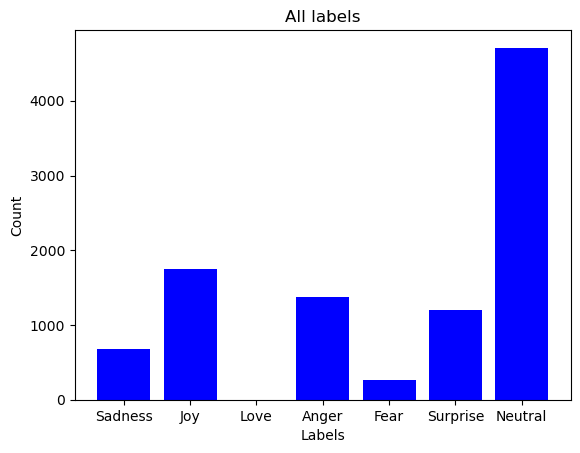

In [19]:
# histogram of the labels df_clean_2
label_list_3 = df_clean_3['label'].tolist()
#sadness = 0, joy = 1, love = 2, anger = 3, fear = 4, surprise = 5, neutral = 6
fig, ax = plt.subplots()
sentiments = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise', 'Neutral']
counts = [label_list_3.count(0), label_list_3.count(1), label_list_3.count(2), label_list_3.count(3), label_list_3.count(4), label_list_3.count(5), label_list_3.count(6)]

ax.bar(sentiments, counts, color='blue')
ax.set_title('All labels')
ax.set_xlabel('Labels')
ax.set_ylabel('Count')
plt.show()

In [18]:
#drop na
df_clean_1.dropna(inplace=True)
print(df_clean_1.shape)
print(df_clean_1.head())

NameError: name 'df_clean_1' is not defined

In [20]:
# join datasets
df_clean = pd.concat([df_clean_1, df_clean_2, df_clean_3], ignore_index=True)
print(df_clean.shape)

(65989, 2)


### Data distribution for combined dataset

The distribution of the labels is shown in a histogram for the combined dataset.

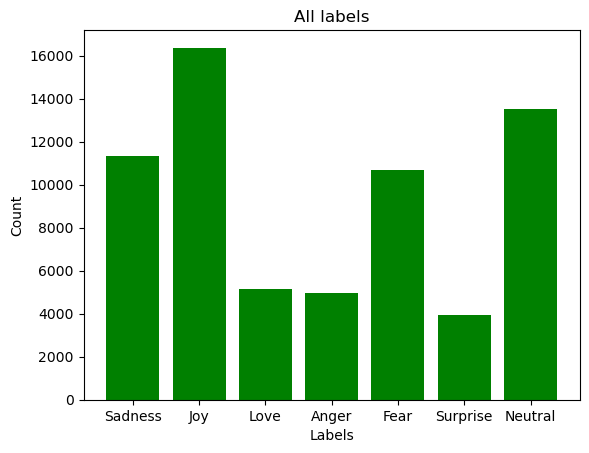

In [21]:
label_list_clean = df_clean['label'].tolist()

#sadness = 0, joy = 1, love = 2, anger = 3, fear = 4, surprise = 5, neutral = 6
fig, ax = plt.subplots()
sentiments = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise', 'Neutral']
counts = [label_list_clean.count(0), label_list_clean.count(1), label_list_clean.count(2), label_list_clean.count(3), label_list_clean.count(4), label_list_clean.count(5), label_list_clean.count(6)]

ax.bar(sentiments, counts, color='green')
ax.set_title('All labels')
ax.set_xlabel('Labels')
ax.set_ylabel('Count')
plt.show()

## Outfile with datasets concatenated

The combined dataset is saved in a csv file called out.csv.

In [22]:
from pathlib import Path

filepath = Path('../data/cleaned/out.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
df_clean.to_csv(filepath, index=False)

In [23]:
# Read in the data
df_clean_imp = pd.read_csv('../data/cleaned/out.csv')
df_clean_imp.head()
df_clean_imp.shape

(65989, 2)

# Audio processing

## Segment Determination

In [7]:
ruta = '../data/audios/'
carpetas = ['train', 'test', 'validation']
duraciones = []

for carpeta in carpetas:
    carpeta_ruta = os.path.join(ruta, carpeta)
    archivos = os.listdir(carpeta_ruta)
    
    for archivo in archivos:
        archivo_ruta = os.path.join(carpeta_ruta, archivo)
        if(".wav" in archivo_ruta):
            duracion = librosa.get_duration(path=archivo_ruta)
            duraciones.append(duracion)
    

## Grafico de distribucion

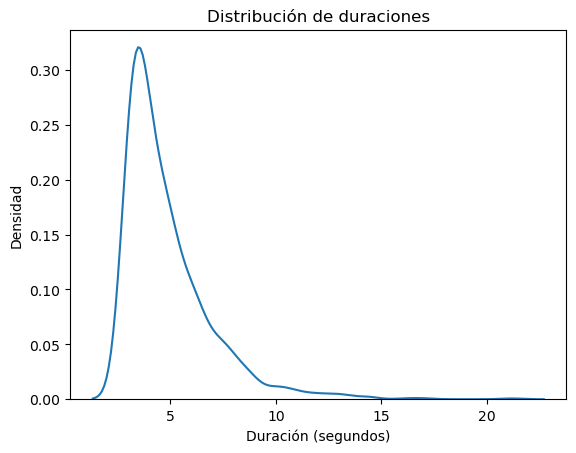

In [8]:
sns.kdeplot(duraciones)

plt.xlabel("Duración (segundos)")
plt.ylabel("Densidad")
plt.title("Distribución de duraciones")

# Mostrar el gráfico
plt.show()

In [15]:
import numpy as np

percentil_5 = np.percentile(duraciones, 5)

S = percentil_5

# Calcular el porcentaje de audios con duración mayor que S
num_audios_mayores = sum(d > S for d in duraciones)
porcentaje_audios_mayores = num_audios_mayores / len(duraciones) * 100
print("El ",porcentaje_audios_mayores,"% de los audios tiene una duracion mayor que ",S)
minima = 2.94


El  94.46460980036298  tiene una duracion mayor que  2.9358730158730157


## Features extraction

In [16]:
# Features lists
mfccs = []
DFTs = []
mel = []
chromas = []

for carpeta in carpetas:
    carpeta_ruta = os.path.join(ruta, carpeta)
    archivos = os.listdir(carpeta_ruta)
    
    for archivo in archivos:
        archivo_ruta = os.path.join(carpeta_ruta, archivo)
        if(".wav" in archivo_ruta):
            audio, sr = librosa.load(path=archivo_ruta)

            duracion = librosa.get_duration(y=audio, sr=sr)
            if duracion < minima:
                continue
            
            #Segment creation
            inicio_ventana = librosa.time_to_samples(duracion / 2 - minima / 2, sr=sr)
            fin_ventana = librosa.time_to_samples(duracion / 2 + minima / 2, sr=sr)
            ventana = audio[inicio_ventana:fin_ventana]
            y = ventana
            
            #Lists are filled
            mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
            D = librosa.stft(y)
            magnitude, _ = librosa.magphase(D)
            magnitude_db = librosa.amplitude_to_db(magnitude)
            S = librosa.feature.melspectrogram(y=y, sr=sr)
            hop_length = 512
            chroma = librosa.feature.chroma_stft(y=y, sr=sr, hop_length=hop_length)

            mfccs.append(mfcc)
            DFTs.append(magnitude_db)
            mel.append(S)
            chromas.append(chroma)

mfccs = np.array(mfccs)

## MFCC

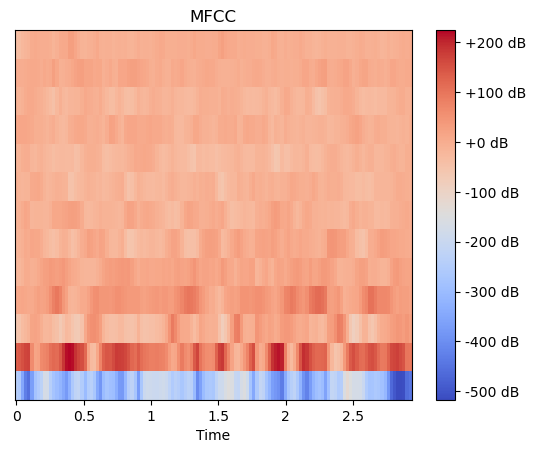

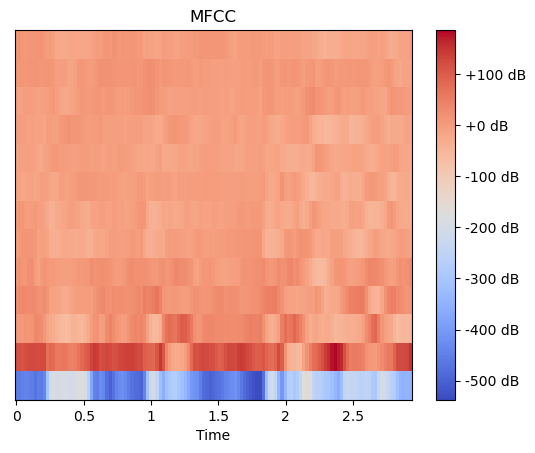

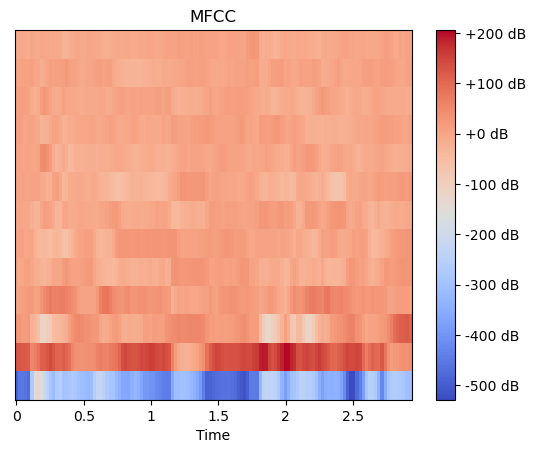

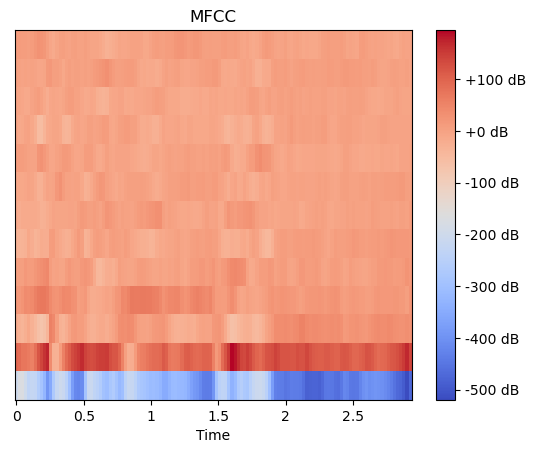

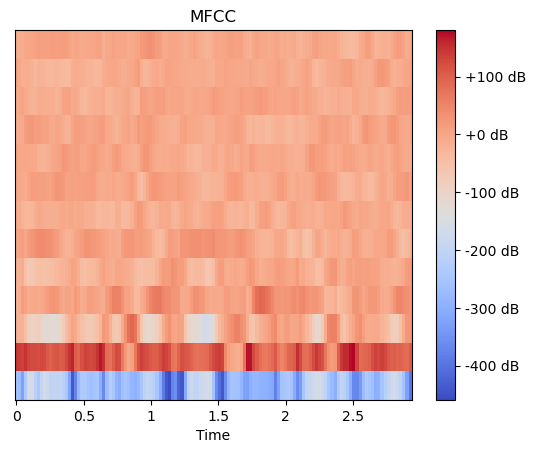

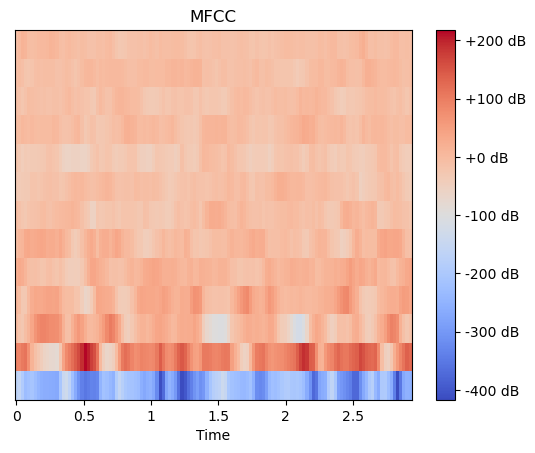

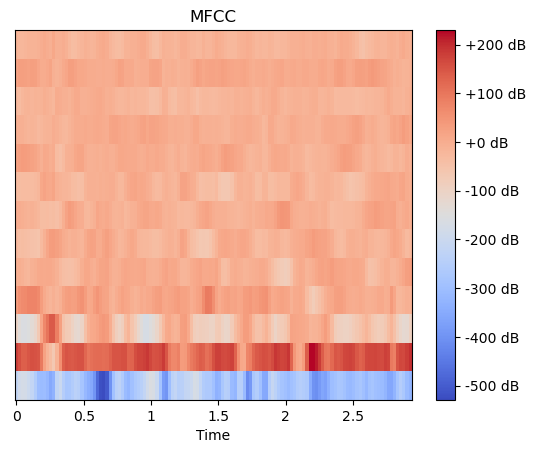

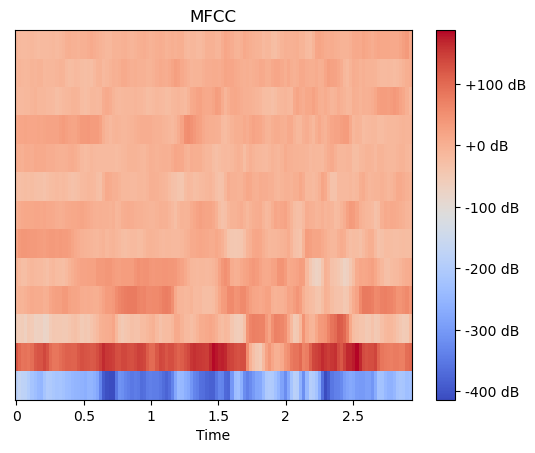

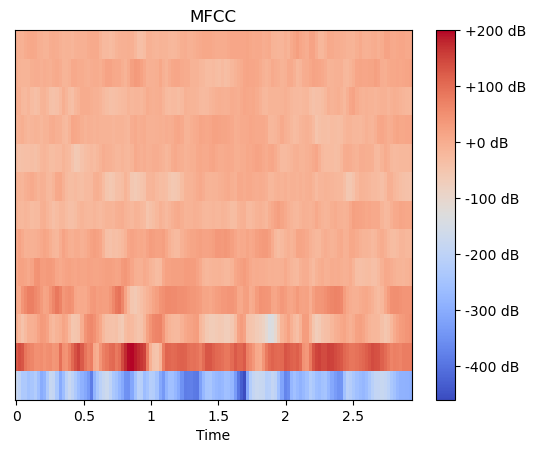

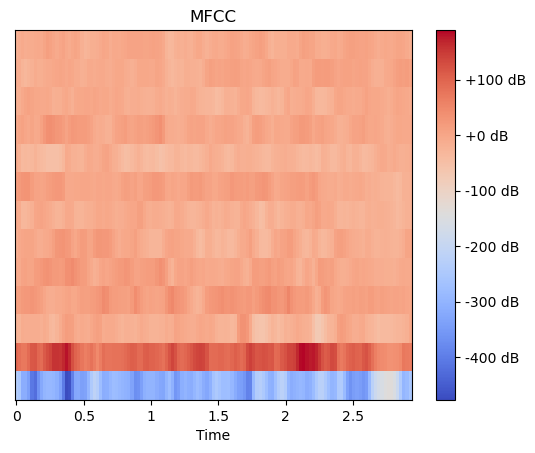

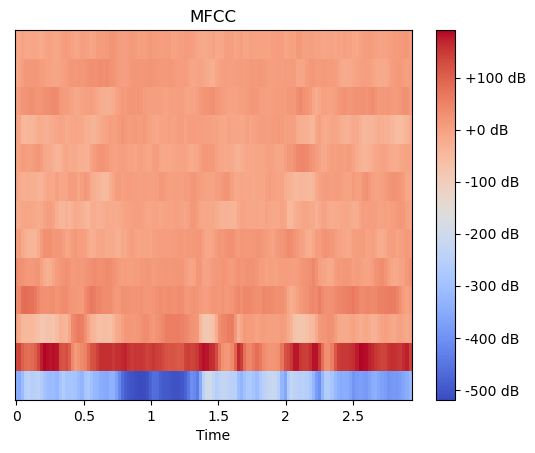

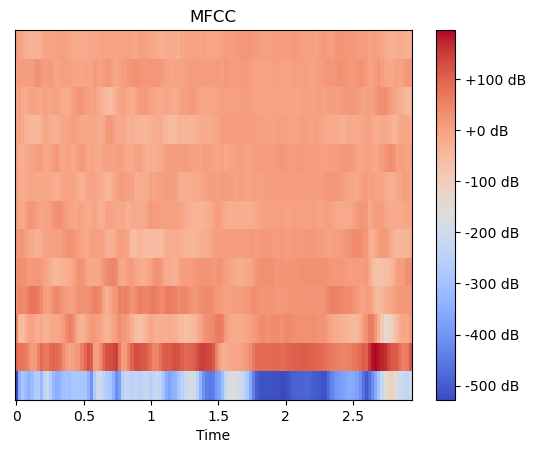

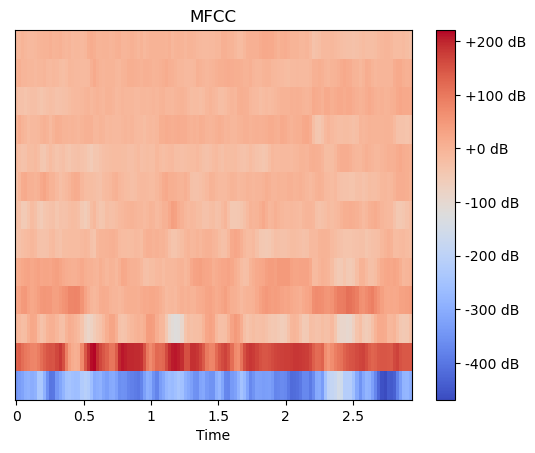

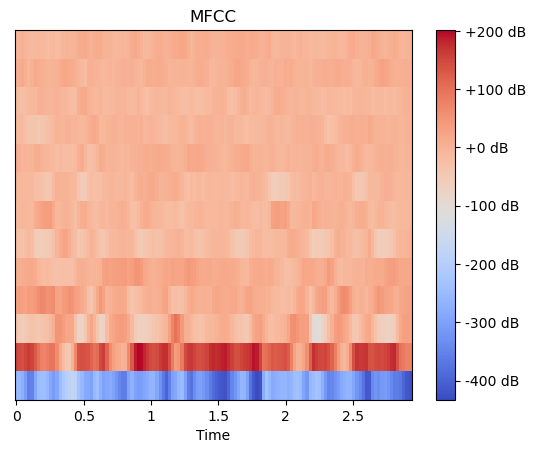

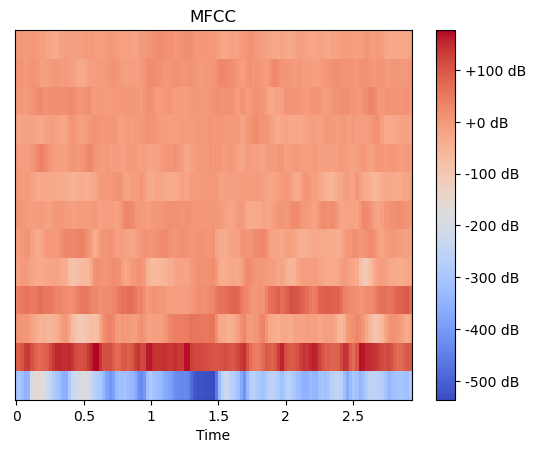

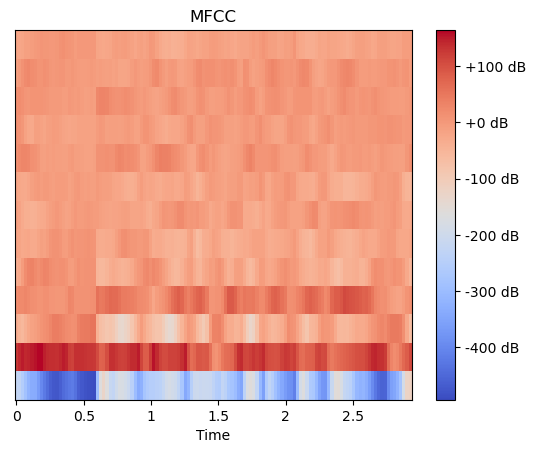

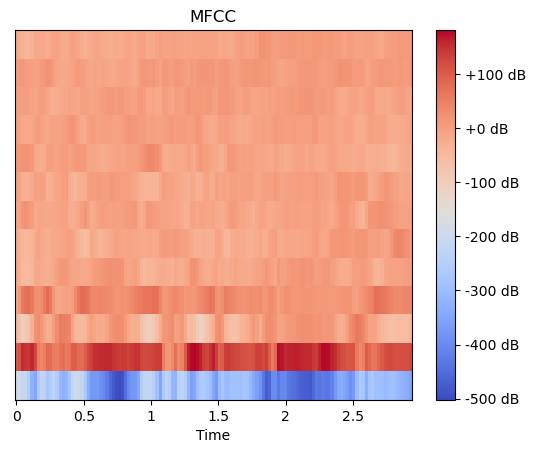

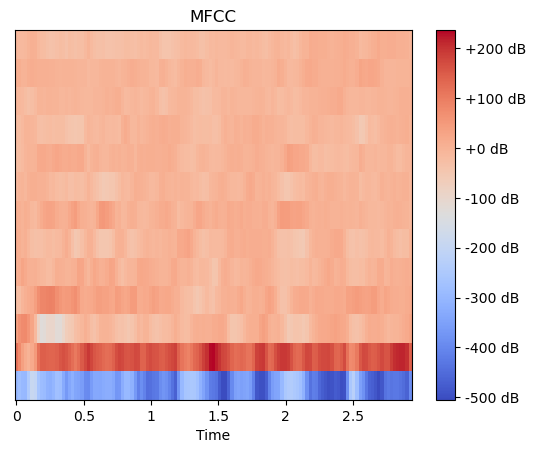

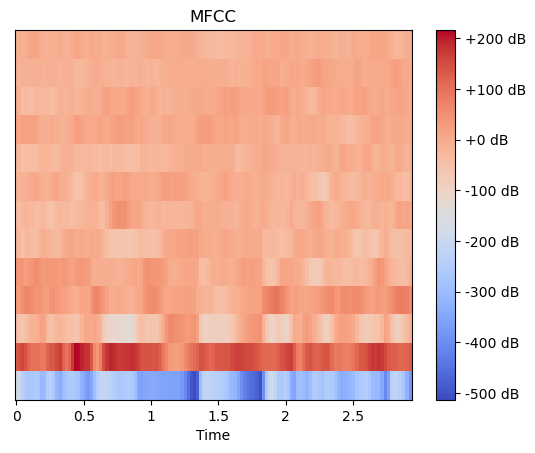

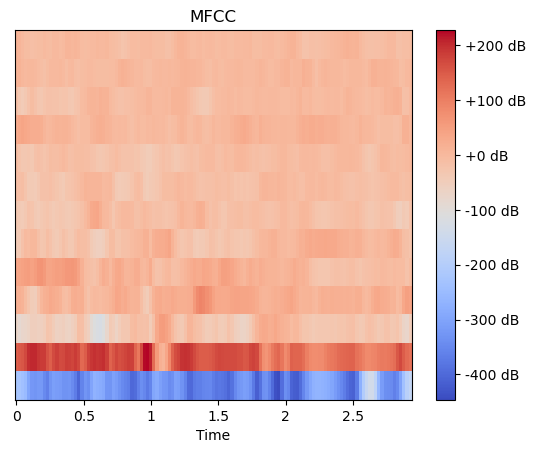

In [19]:
import librosa.display
# Mostrar los coeficientes MFCC como un espectrograma
for i in range(20):
    fig, ax = plt.subplots()
    img = librosa.display.specshow(mfccs[i], x_axis='time')
    ax.set_title('MFCC')
    fig.colorbar(img, ax=ax, format="%+2.0f dB")

## DFT

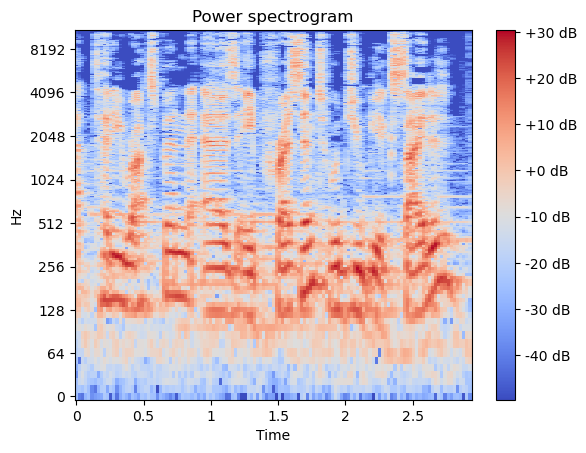

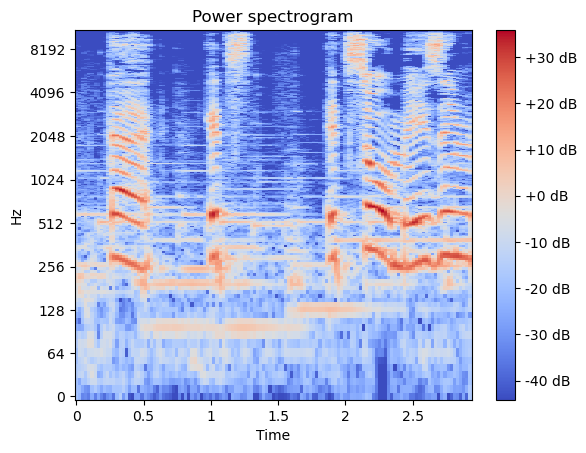

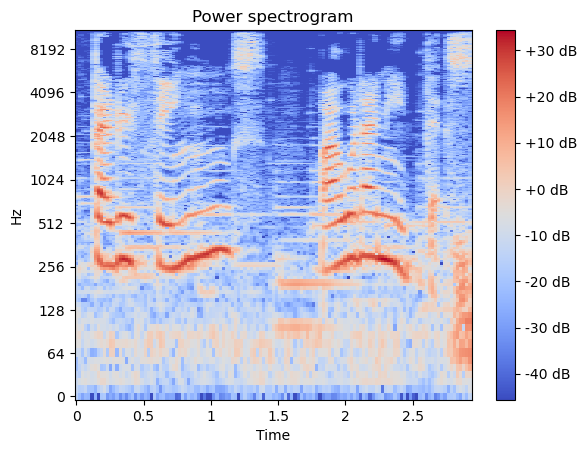

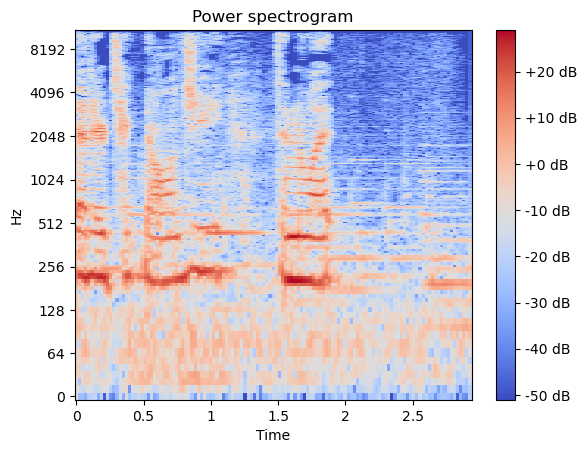

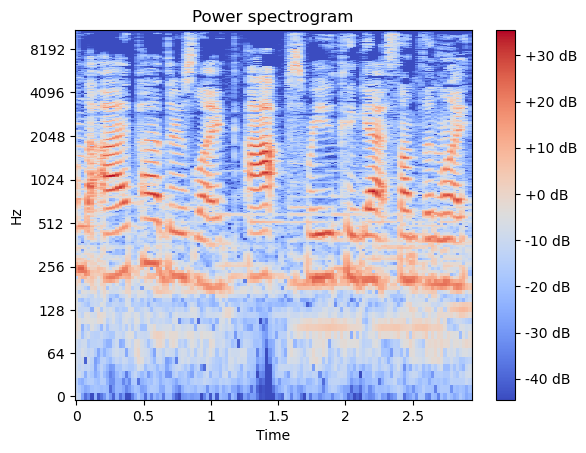

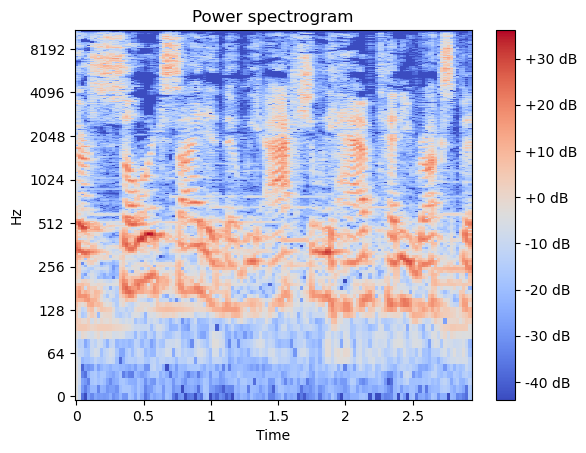

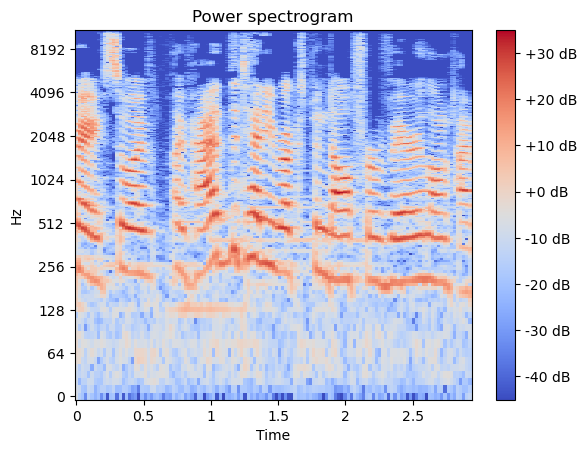

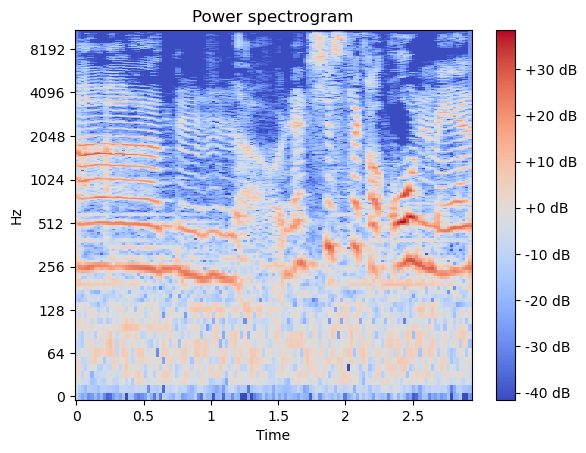

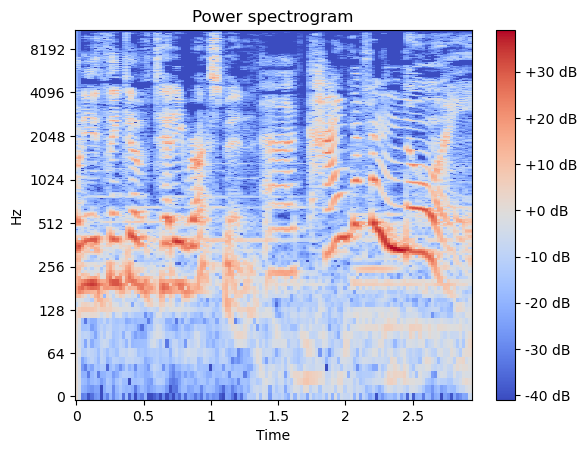

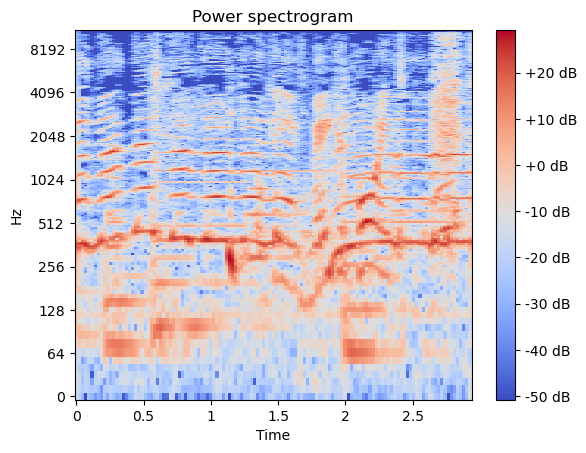

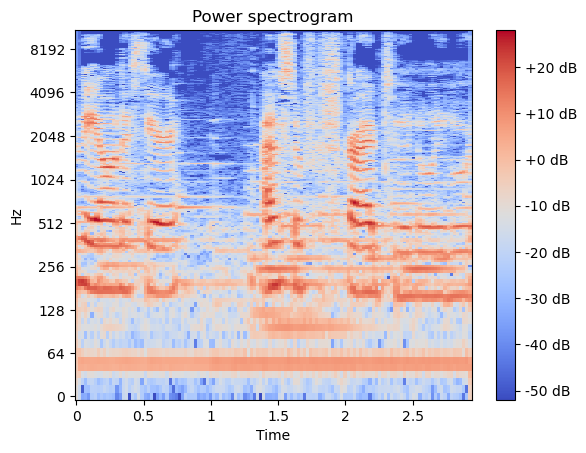

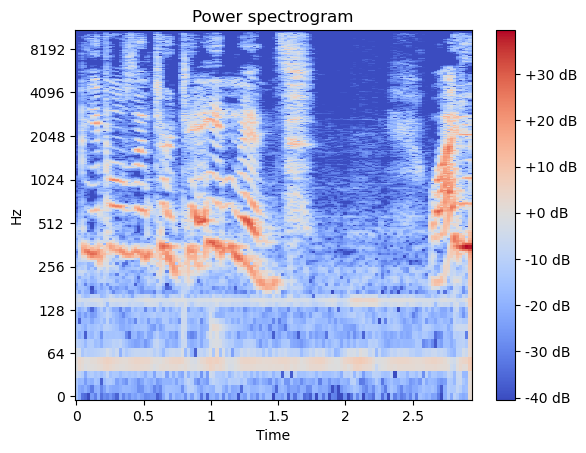

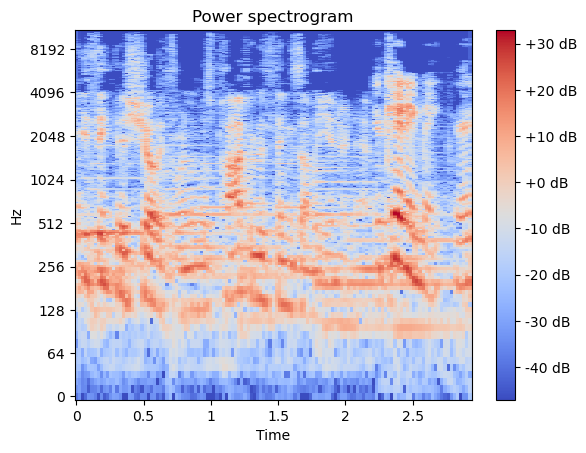

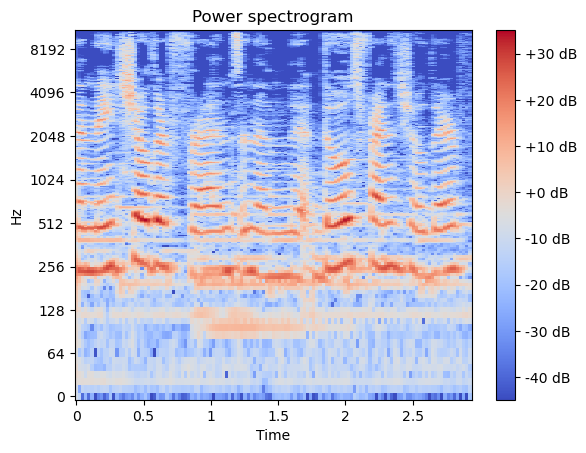

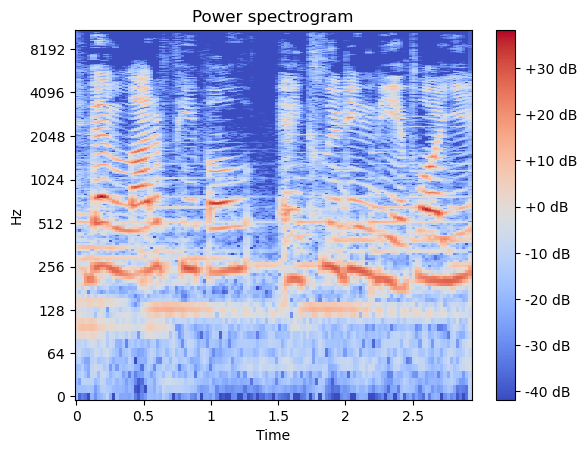

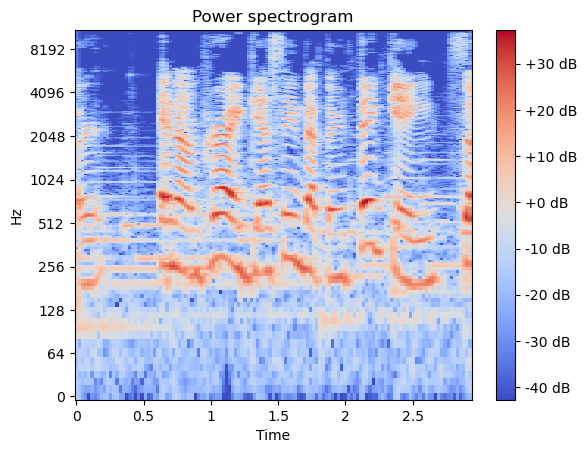

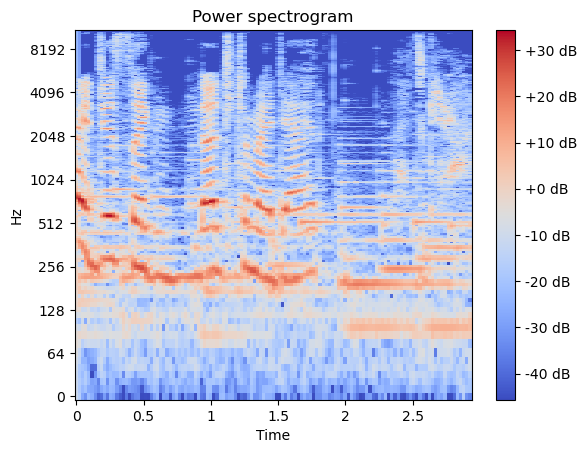

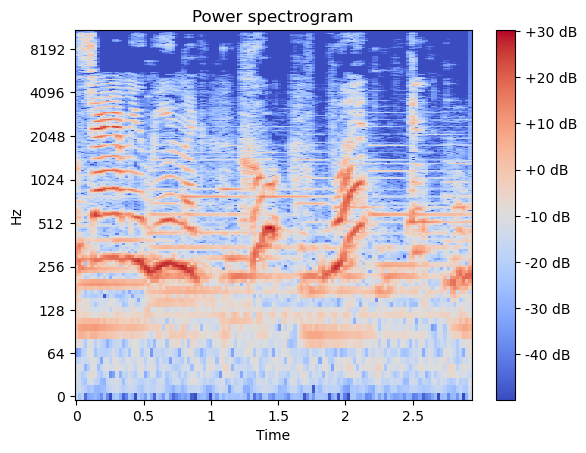

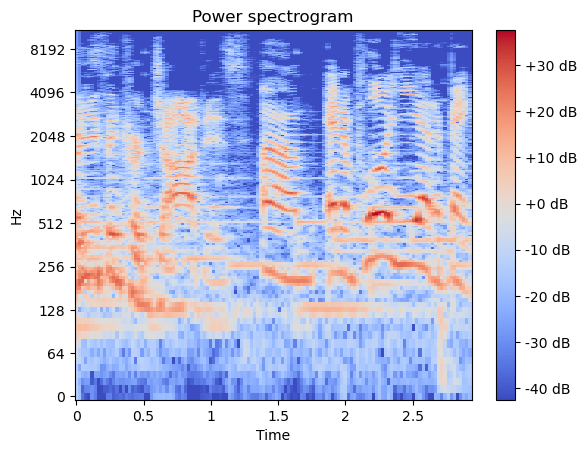

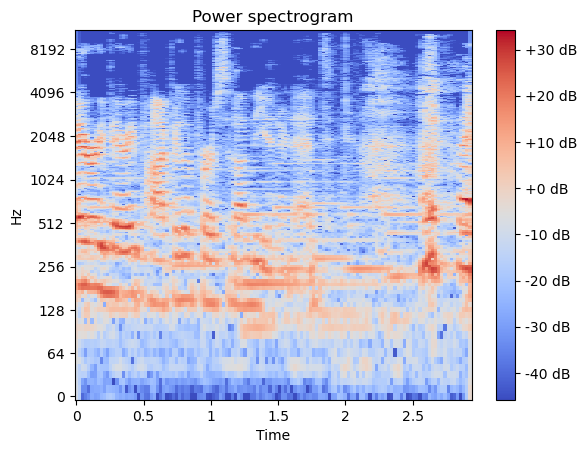

In [20]:
for i in range(20):
    fig, ax = plt.subplots()
    img = librosa.display.specshow(DFTs[i],
                               y_axis='log', x_axis='time', ax=ax)
    ax.set_title('Power spectrogram')
    fig.colorbar(img, ax=ax, format="%+2.0f dB")

## Mel spectogram

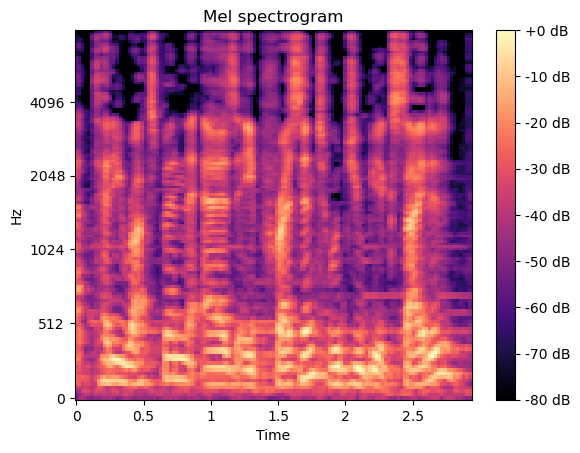

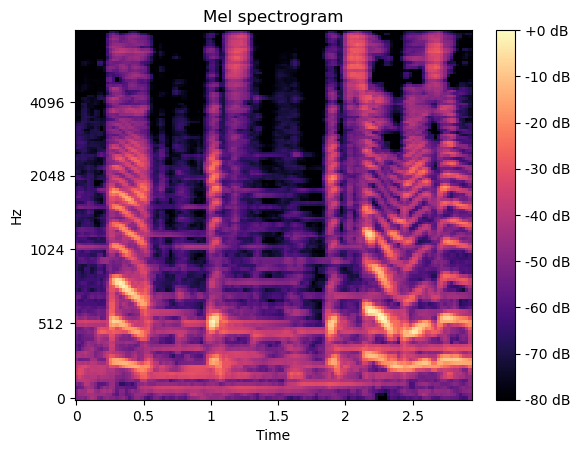

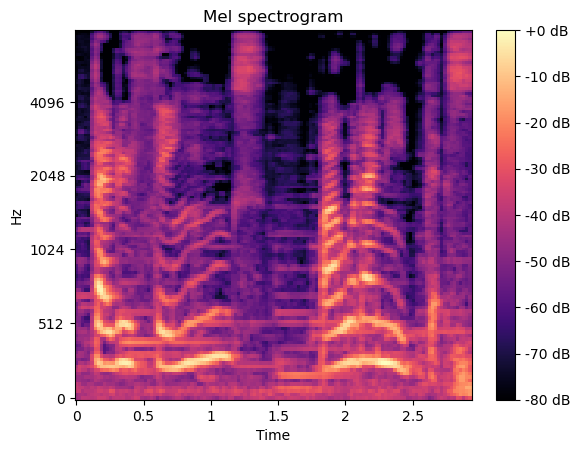

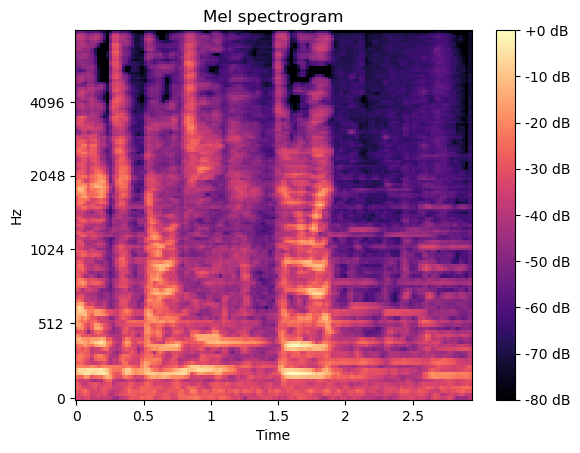

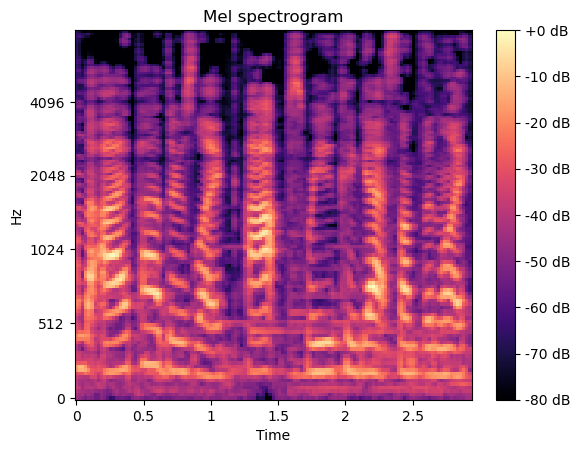

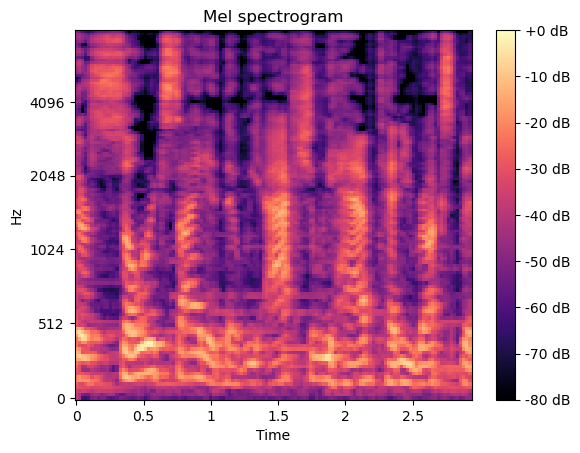

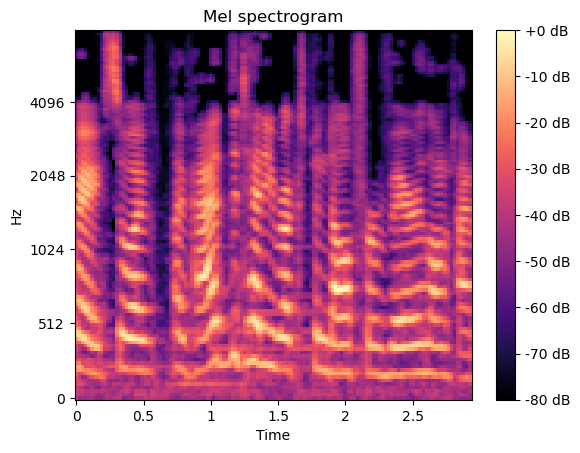

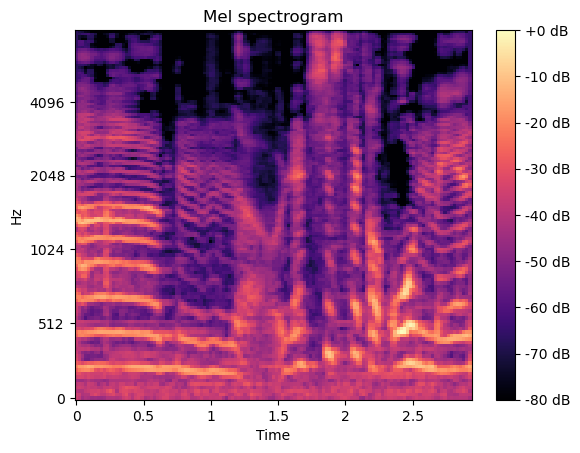

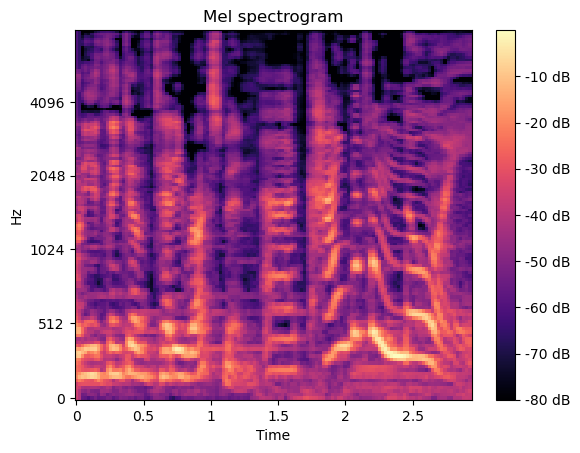

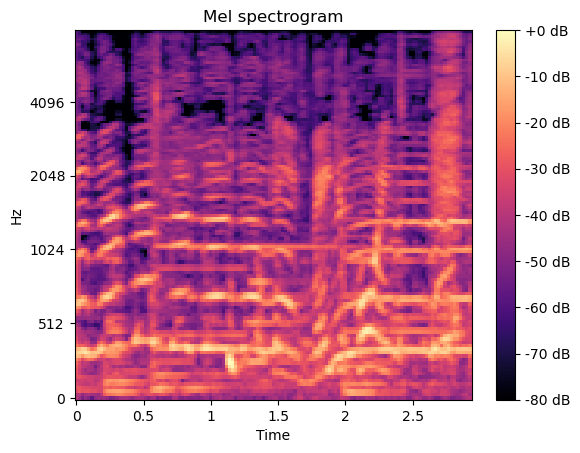

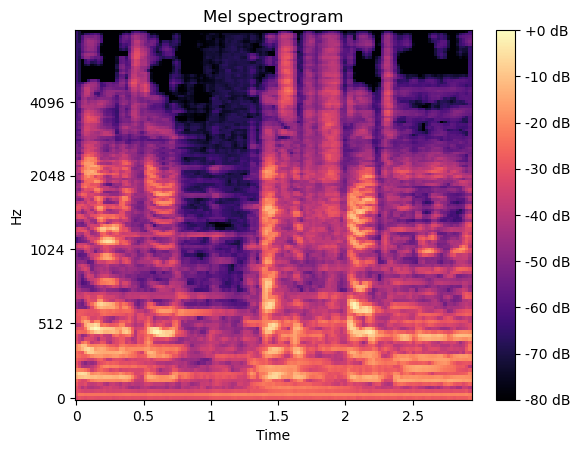

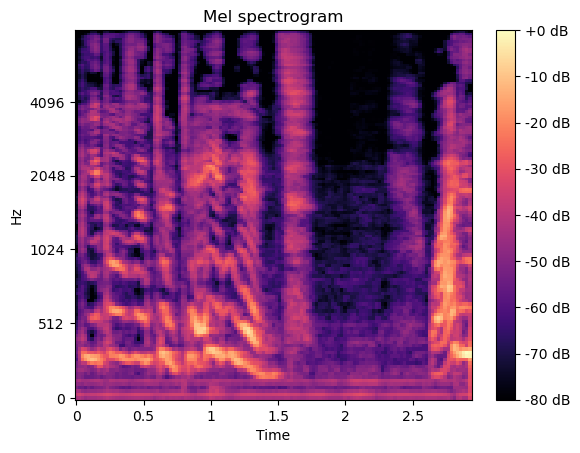

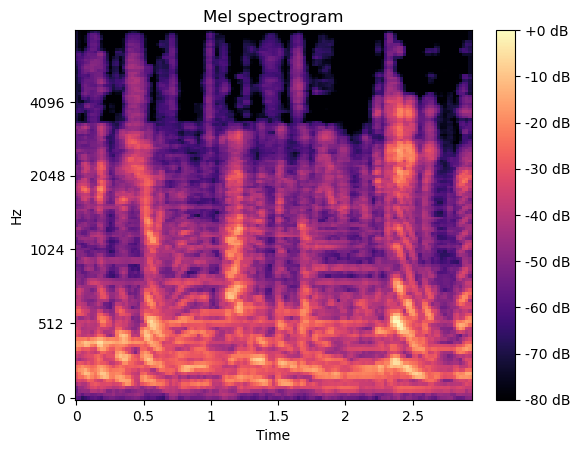

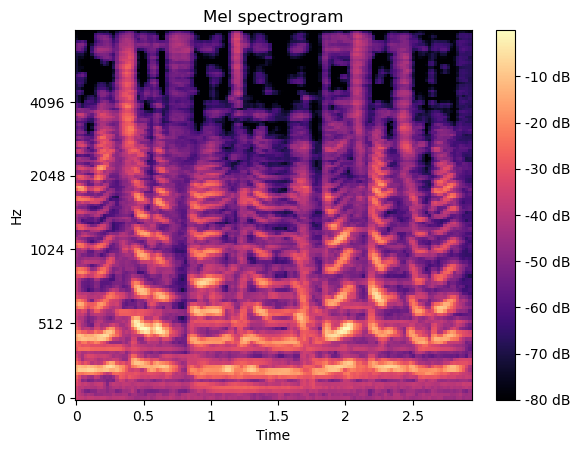

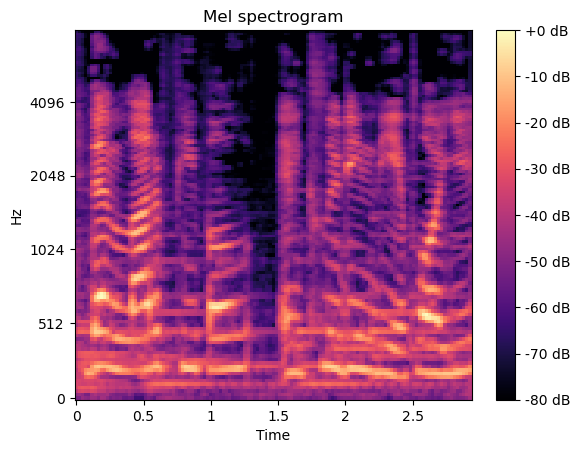

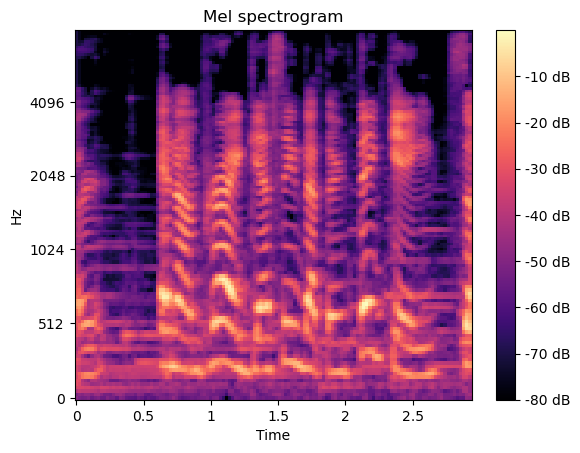

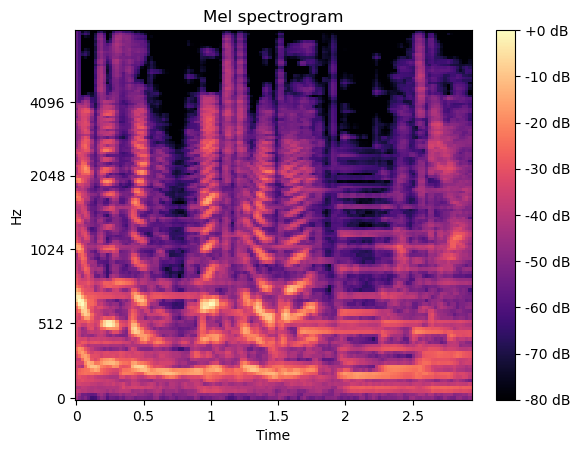

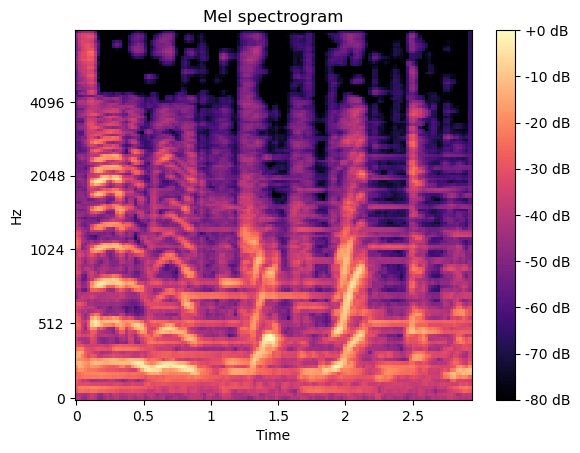

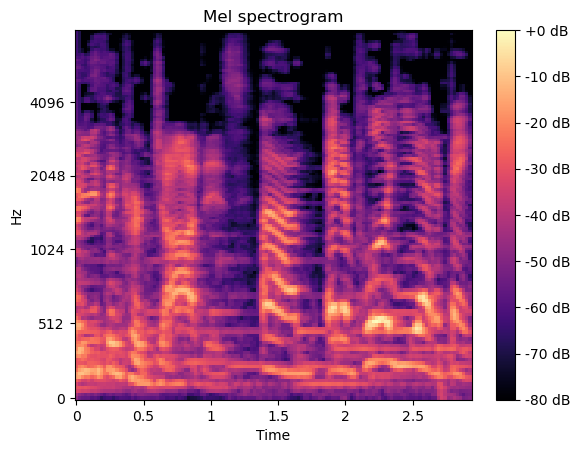

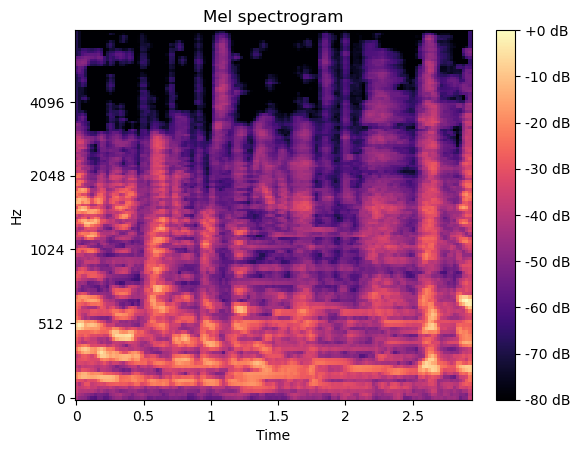

In [21]:
for i in range(20):
    fig, ax = plt.subplots()
    img = librosa.display.specshow(librosa.power_to_db(mel[i], ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
    ax.set_title('Mel spectrogram')
    fig.colorbar(img, ax=ax, format="%+2.0f dB")

## Chromagram

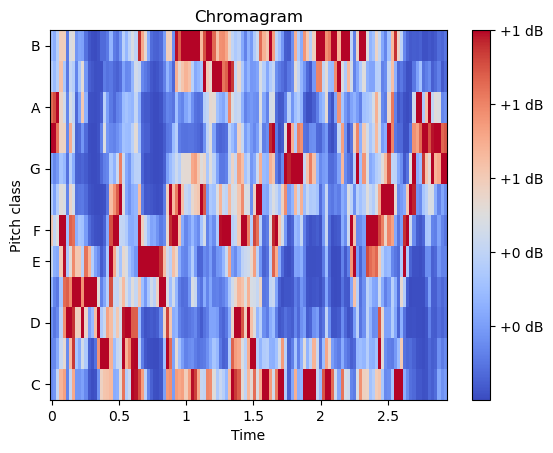

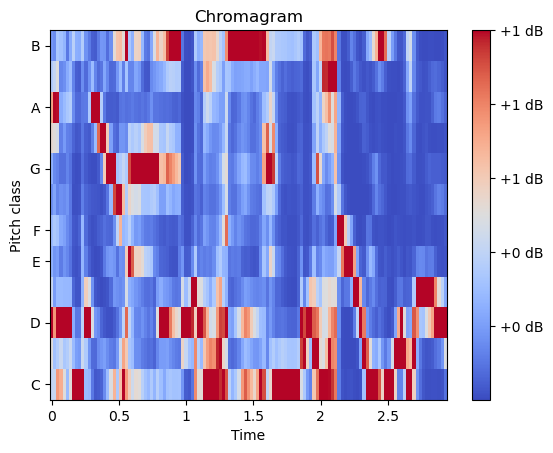

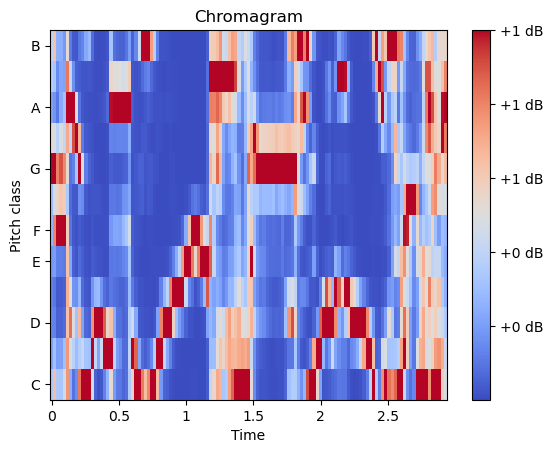

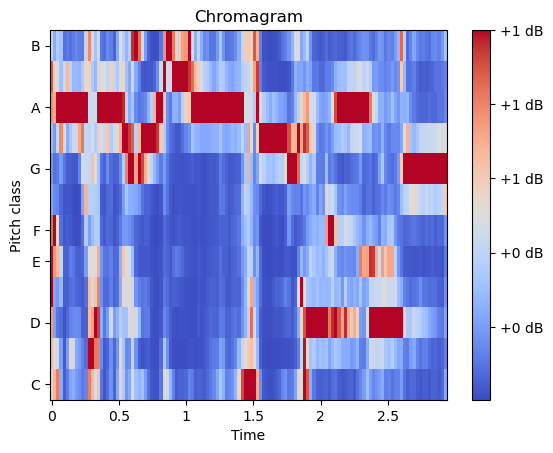

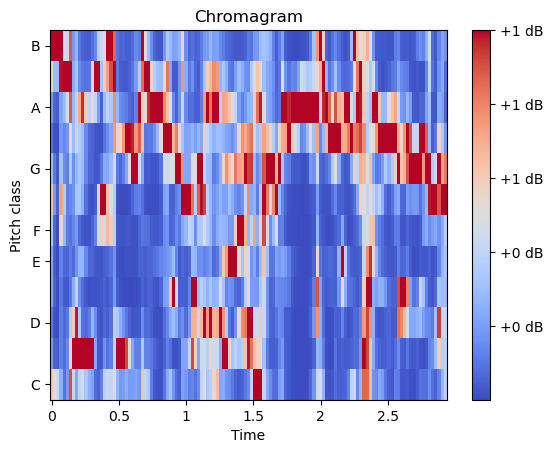

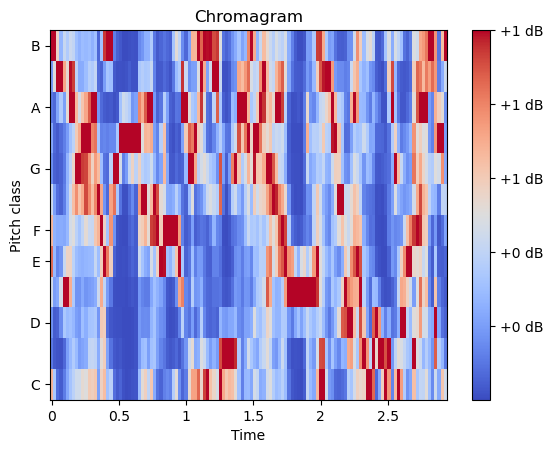

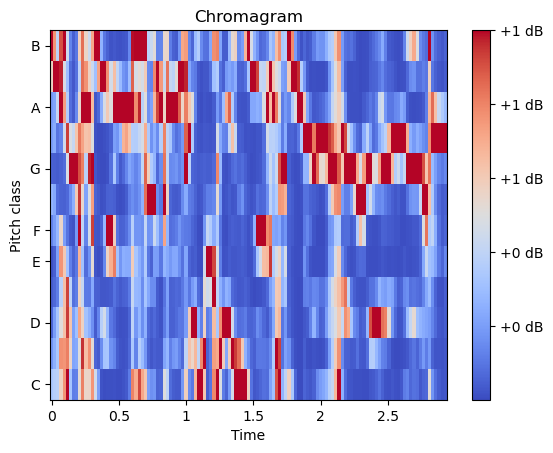

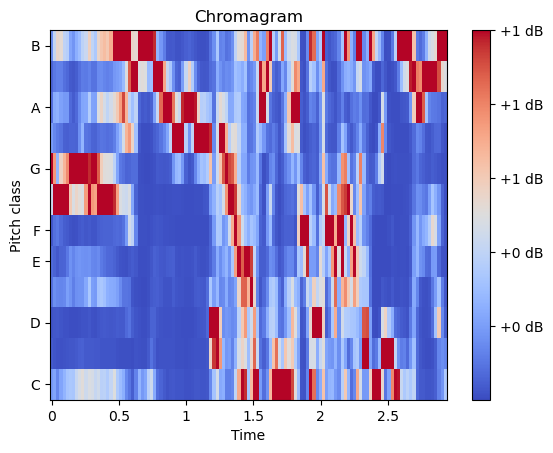

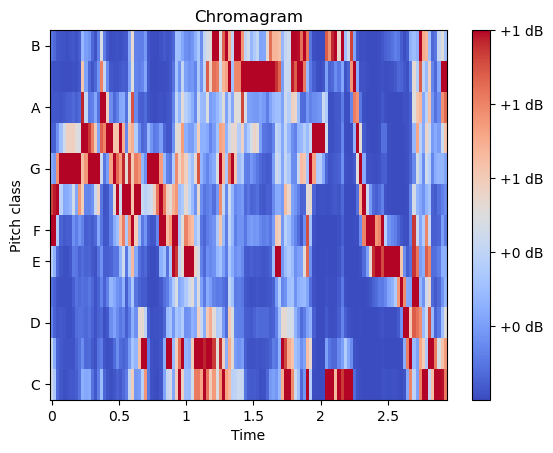

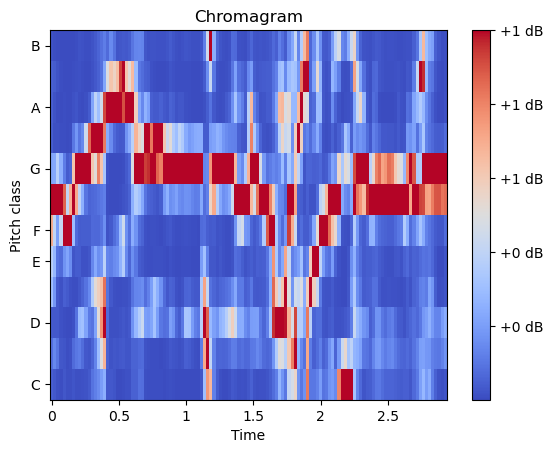

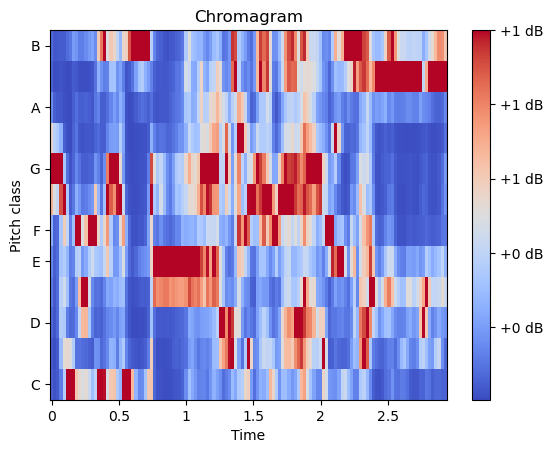

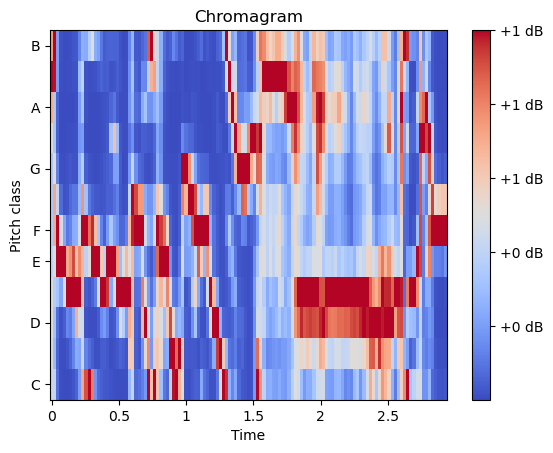

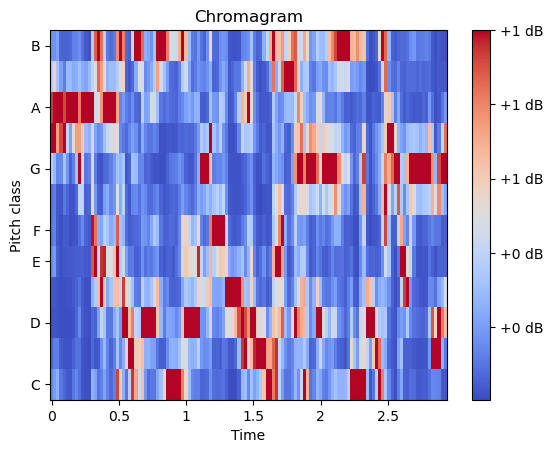

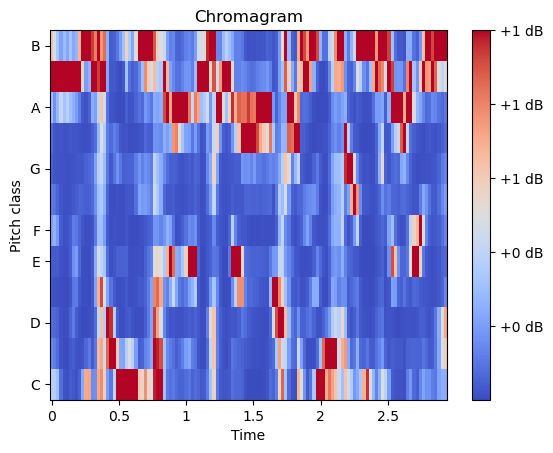

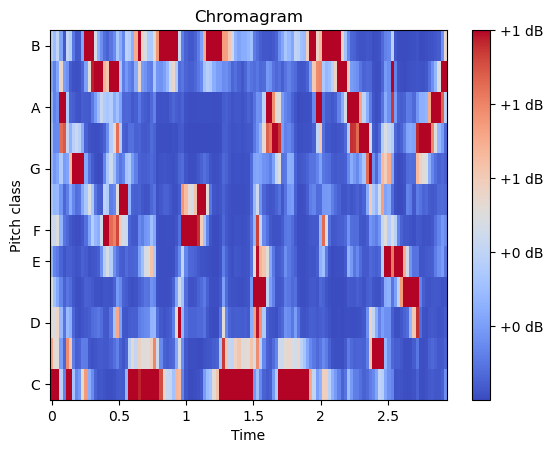

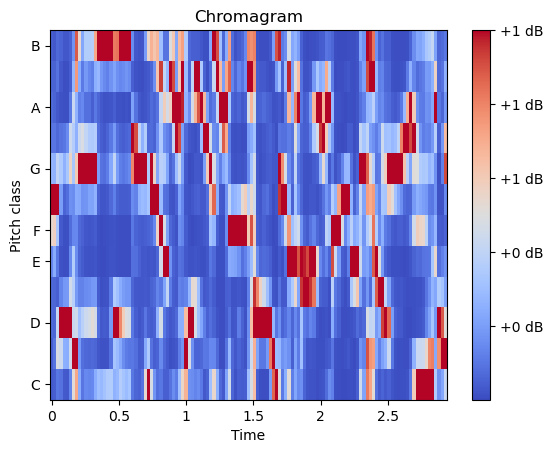

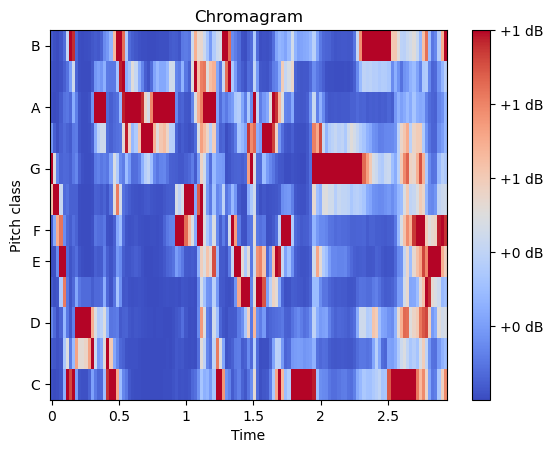

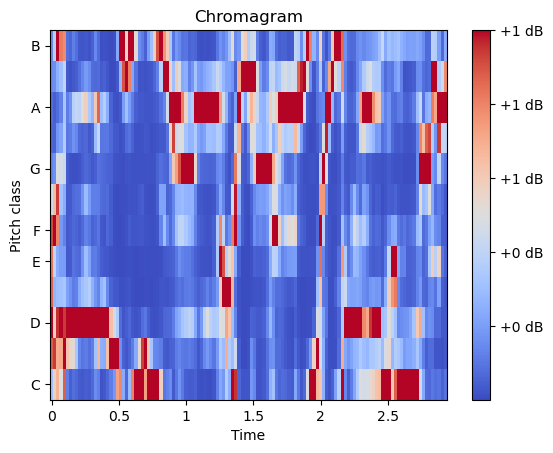

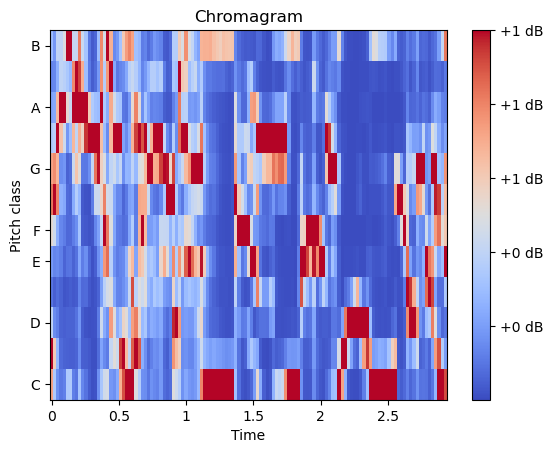

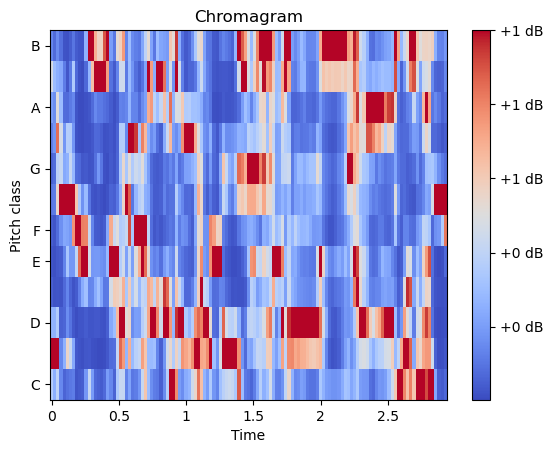

In [22]:
for i in range(20):
    fig, ax = plt.subplots()
    img = librosa.display.specshow(chromas[i], x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
    ax.set_title('Chromagram')
    fig.colorbar(img, ax=ax, format="%+2.0f dB")